In [1]:
# To accumulate waiting time for several simulations
times_transit_acc = None
times_drt_acc = None

In [2]:
import json
import requests
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import pandas as pd
import random
import glob
import zipfile
import os
import shutil

In [3]:
fp = open('data/population_lolland_4500_0.json')
tdump_pop = json.load(fp)
fp.close()
population = tdump_pop.get('persons')

In [4]:
scenario_name = "0"
path_to_zip_file = '/home/ai6644/Malmo/Tools/Simulation results/Lolland/TRB/drt rerun/base/'+\
                   scenario_name+'/log.zip'

scenario_name_pt = "0"
path_to_zip_file_pt = '/home/ai6644/Malmo/Tools/Simulation results/Lolland/TRB/bus/base/'+\
                   scenario_name_pt+'/log.zip'

In [5]:
day_sec = int(86400)
day_h = int(24)

In [6]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    try:
        shutil.rmtree('data/zip')
    except (FileNotFoundError, OSError) as e:
        pass
    os.mkdir('data/zip')
    zip_ref.extractall('data/zip')
path = 'data/zip/' + os.listdir('data/zip')[0] + '/trip_dump.json'
all_files = glob.glob("data/zip/*/vehicle_logs/vehicle_occupancy_*")
n_cars = len(all_files)
fp = open(path)
tdump = json.load(fp)
fp.close()

In [7]:
with zipfile.ZipFile(path_to_zip_file_pt, 'r') as zip_ref:
    try:
        shutil.rmtree('data/zip')
    except (FileNotFoundError, OSError) as e:
        pass
    os.mkdir('data/zip')
    zip_ref.extractall('data/zip')
path_pt = 'data/zip/' + os.listdir('data/zip')[0] + '/trip_dump.json'
fp_pt = open(path_pt)
tdump_pt = json.load(fp_pt)
fp.close()

In [8]:

class OtpMode(object):
    CAR = 'CAR'
    WALK = 'WALK'
    TRANSIT = 'TRANSIT,WALK'
    BUS = 'BUS,WALK'
    RAIL = 'TRAM,RAIL,SUBWAY,FUNICULAR,GONDOLA,WALK'
    BICYCLE = 'BICYCLE'
    BICYCLE_TRANSIT = 'TRANSIT,BICYCLE'
    PARK_RIDE = 'CAR_PARK,WALK,TRANSIT'
    KISS_RIDE = 'CAR,WALK,TRANSIT'
    BIKE_RIDE = 'BICYCLE_PARK,WALK,TRANSIT'
    RENTED_BICYCLE = 'WALK,BICYCLE_RENT'
    TRANSIT_RENTED_BICYCLE = 'TRANSIT,WALK,BICYCLE_RENT'
    DRT = 'DRT'
    DRT_TRANSIT = 'DRT_TRANSIT'

    _DICT = ['CAR', 'WALK', 'TRANSIT', 'BUS', 'RAIL', 'BICYCLE', 'BICYCLE_TRANSIT', 'PARK_RIDE', 'KISS_RIDE',
             'BIKE_RIDE', 'RENTED_BICYCLE', 'TRANSIT_RENTED_BICYCLE', 'DRT', 'DRT_TRANSIT']

    _MAIN_MODES = ['CAR', 'BICYCLE', 'TRANSIT', 'WALK']

    _DRT_MODES = ['DRT', 'DRT_TRANSIT']

    _PT_MODES = ['TRANSIT', 'BUS', 'RAIL']

    @staticmethod
    def get_all_modes():
        return [OtpMode.__dict__.get(item) for item in OtpMode._DICT]

    @staticmethod
    def get_main_modes():
        return [OtpMode.__dict__.get(item) for item in OtpMode._MAIN_MODES]

    @staticmethod
    def contains(other):
        return other in OtpMode._DICT

    @staticmethod
    def get_pt_modes():
        return OtpMode._PT_MODES

    @staticmethod
    def get_drt_modes():
        return OtpMode._DRT_MODES

    @staticmethod
    def get_mode(string):
        if OtpMode.contains(string):
            return OtpMode.__getattribute__(OtpMode(), string)
        else:
            raise Exception('unsupported mode {}'.format(string))


In [9]:
persons = tdump.get('person')
persons_pt = tdump_pt.get('person')

In [10]:
persons_drt = []
for person in persons:
    try:
        if person['actual_trips'][0]['main_mode'] in ['DRT', 'DRT_TRANSIT']:
            persons_drt.append(person)
    except:
        continue

In [11]:
len(persons_drt)

1246

# Trip length distribution

In [12]:
persons_drt[0]['direct_trips'][0]['legs']

[{'mode': 'DRT',
  'start_coord': {'lat': 54.876196, 'lon': 11.089281},
  'end_coord': {'lat': 54.833037, 'lon': 11.139549},
  'distance': 7277.799999999999,
  'duration': 577.9,
  'steps': [{'start_coord': {'lat': 54.876196, 'lon': 11.089281},
    'end_coord': {'lat': 54.873724, 'lon': 11.102378},
    'distance': 985.7,
    'duration': 88.5},
   {'start_coord': {'lat': 54.873724, 'lon': 11.102378},
    'end_coord': {'lat': 54.87308, 'lon': 11.117829},
    'distance': 991.5,
    'duration': 57.7},
   {'start_coord': {'lat': 54.87308, 'lon': 11.117829},
    'end_coord': {'lat': 54.866594, 'lon': 11.115547},
    'distance': 737,
    'duration': 72.3},
   {'start_coord': {'lat': 54.866594, 'lon': 11.115547},
    'end_coord': {'lat': 54.866583, 'lon': 11.115686},
    'distance': 9,
    'duration': 1.6},
   {'start_coord': {'lat': 54.866583, 'lon': 11.115686},
    'end_coord': {'lat': 54.855478, 'lon': 11.118964},
    'distance': 1274.7,
    'duration': 74},
   {'start_coord': {'lat': 54.85

In [13]:
distances = []
# for person in persons_drt:
for person in persons:
    try:
        distances.append(person['direct_trips'][0]['distance'])
#         legs = persons_drt[0]['direct_trips'][0]['legs']
#         for leg in legs:
#             if leg['mode'] == 'DRT':
#                 distances.append(leg['distance'])
    except:
        print(person['id'])
distances = [d / 1000 for d in distances]

92
201
528
843
900
1002
1135
1436
1480
1550
1732
1947
2015
2062
2099
2197
2365
2498
3136
3212
3500
3511
3544
3794
4034
4262
4279
4343
4410
4459


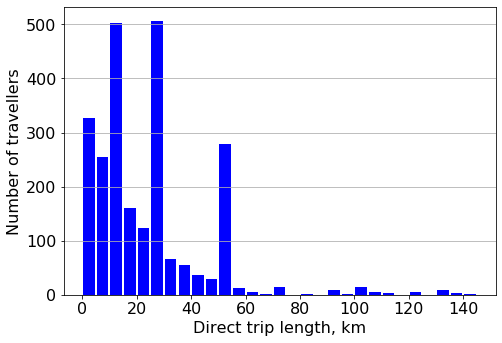

In [14]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=distances, bins=np.arange(0,150,5), color='blue', rwidth=0.85, density=False)

plt.grid(axis='y')
plt.xlabel('Direct trip length, km')
plt.ylabel('Number of travellers')
# plt.title('"Waiting" time, DRT')
# plt.ylim([0,80])
plt.savefig('data/demand_distance_distr.eps', bbox_inches="tight")

# Deviation of actual trip start time to requested trip start time

In [15]:
perspop = []
for person in population:
    for activity in person['activities']:
        if activity['type'] == "WORK":
            t = sum([x*k for x,k in zip([int(t) for t in activity['end_time'].split(":")], [60*60, 60, 1])])
            perspop.append({'time_req': t, 'id': person['id']})

In [16]:
perstrips_drt = []
for person in persons:
    try:
        if person['actual_trips'][0]['main_mode'] in ['DRT']:
            perstrips_drt.append({'time_act': person['actual_trips'][0]['legs'][0]['start_time'], 'id': person['id']})
    except IndexError as e:
        print(person['id'])
        continue

92
201
528
843
900
1002
1135
1436
1480
1550
1732
1947
2015
2062
2099
2197
2365
2498
3136
3212
3500
3511
3544
3794
4034
4262
4279
4343
4410
4459


In [17]:
perstrips_transit = []
for person in persons_pt:
    try:
        if person['actual_trips'][0]['main_mode'] in ['TRANSIT,WALK', 'WALK', 'TRANSIT']:
            perstrips_transit.append({'time_act': person['actual_trips'][0]['legs'][0]['start_time'], 'id': person['id']})
    except IndexError as e:
        print(person['id'])
        continue

92
201
528
843
900
1002
1135
1436
1480
1550
1732
1947
2015
2062
2099
2197
2365
2498
3136
3212
3500
3511
3544
3794
4034
4262
4279
4343
4410
4459


In [18]:
times_drt = pd.concat([pd.DataFrame(perspop).set_index('id'), pd.DataFrame(perstrips_drt).set_index('id')], axis=1).dropna()
times_drt['diff'] = times_drt.time_req - times_drt.time_act

In [19]:
times_drt

,time_req,time_act,diff
id,,,
4,27530,27671.5,-141.5
8,43490,45129.2,-1639.2
16,52239,53554.5,-1315.5
19,36473,37588.7,-1115.7
28,48928,49162.3,-234.3
...,...,...,...
4516,58098,57198.4,899.6
4517,45082,46384.7,-1302.7
4519,57515,59112.0,-1597.0


In [20]:
index = times_drt.index

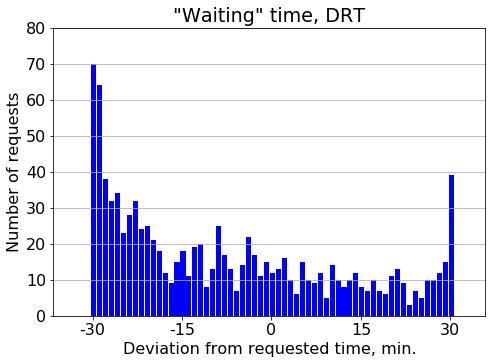

In [21]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=times_drt['diff'], bins=np.arange(-2000,2000,60), color='blue', rwidth=0.85, density=False)

plt.xticks([x*60 for x in [-30, - 15, 0, 15, 30]])
ax.set_xticklabels([-30, - 15, 0, 15, 30])
plt.grid(axis='y')
plt.xlabel('Deviation from requested time, min.')
plt.ylabel('Number of requests')
plt.title('"Waiting" time, DRT')
plt.ylim([0,80])

plt.savefig('data/waiting_distr_drt.eps', bbox_inches="tight")

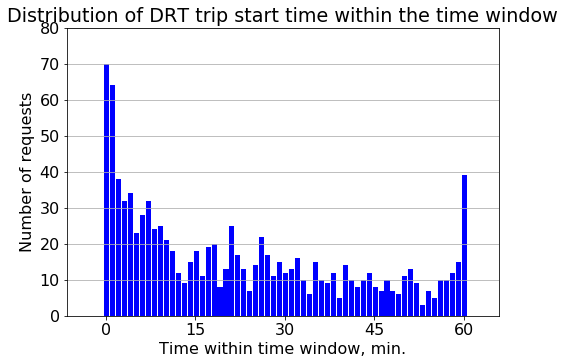

In [23]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=times_drt['diff'], bins=np.arange(-2000,2000,60), color='blue', rwidth=0.85, density=False)

plt.xticks([x*60 for x in [-30, - 15, 0, 15, 30]])
ax.set_xticklabels([0, 15, 30, 45, 60])
plt.grid(axis='y')
plt.xlabel('Time within time window, min.')
plt.ylabel('Number of requests')
plt.title('Distribution of DRT trip start time within the time window')
plt.ylim([0,80])

plt.savefig('data/waiting_distr_drt.eps', bbox_inches="tight")

In [24]:
if times_drt_acc is None:
    times_drt_acc = times_drt['diff']
else:
    times_drt_acc = times_drt_acc.append(times_drt['diff'])

In [25]:
times_transit = pd.concat([pd.DataFrame(perspop).set_index('id'), pd.DataFrame(perstrips_transit).set_index('id')], axis=1).dropna()
times_transit['diff'] = times_transit.time_req - times_transit.time_act
def strip_to_hour(seconds):
    """returns only hour from the time in seconds"""
    return int(seconds / 3600) * 3600
times_transit['time_req_strip'] = [strip_to_hour(t) for t in times_transit.time_req.values]
times_transit['diff2'] = times_transit.time_req_strip - times_transit.time_act

In [26]:
times_transit = times_transit.reindex(index=index).dropna()

In [27]:
times_transit

,time_req,time_act,diff,time_req_strip,diff2
id,,,,,
4,27530.0,26760.0,770.0,25200.0,-1560.0
8,43490.0,42840.0,650.0,43200.0,360.0
16,52239.0,53220.0,-981.0,50400.0,-2820.0
19,36473.0,37440.0,-967.0,36000.0,-1440.0
28,48928.0,47520.0,1408.0,46800.0,-720.0
...,...,...,...,...,...
4516,58098.0,57000.0,1098.0,57600.0,600.0
4517,45082.0,44040.0,1042.0,43200.0,-840.0
4519,57515.0,57000.0,515.0,54000.0,-3000.0


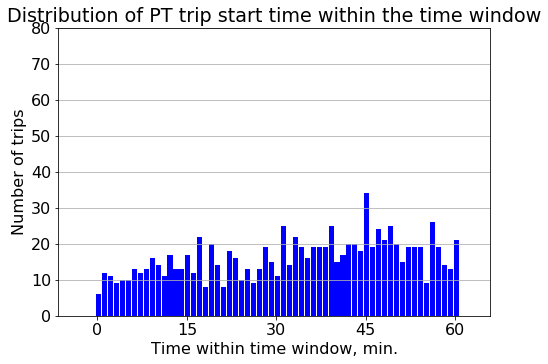

In [29]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=times_transit['diff'], bins=np.arange(-2000,2000,60), color='blue', rwidth=0.85, density=False)

plt.grid(axis='y')
plt.xlabel('Time within time window, min.')
plt.xticks([x*60 for x in [-30, - 15, 0, 15, 30]])
ax.set_xticklabels([0, 15, 30, 45, 60])
plt.ylabel('Number of trips')
plt.title('Distribution of PT trip start time within the time window')
plt.ylim([0,80])

plt.savefig('data/waiting_distr_pt.eps', bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=times_transit['diff'], bins=np.arange(-2000,2000,60), color='blue', rwidth=0.85, density=False)

plt.grid(axis='y')
plt.xlabel('Deviation from requested time, min.')
plt.xticks([x*60 for x in [-30, - 15, 0, 15, 30]])
ax.set_xticklabels([-30, - 15, 0, 15, 30])
plt.ylabel('Number of trips')
plt.title('"Waiting" time, TRANSIT')
plt.ylim([0,80])

plt.savefig('data/waiting_distr_pt.eps', bbox_inches="tight")

In [27]:
if times_transit_acc is None:
    times_transit_acc = times_transit['diff']
else:
    times_transit_acc = times_transit_acc.append(times_transit['diff'])

In [28]:
times_transit_acc

id
4        770.0
8        650.0
16      -981.0
19      -967.0
28      1408.0
         ...  
4516    1098.0
4517    1042.0
4519     515.0
4520     292.0
4522     -23.0
Name: diff, Length: 990, dtype: float64

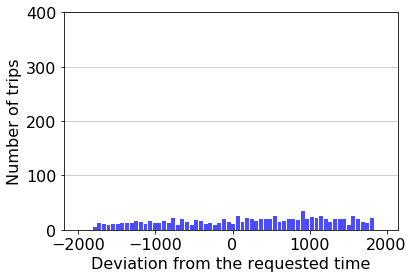

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=times_transit_acc, bins=np.arange(-2000,2000,60), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Deviation from the requested time', {'fontsize': 16})
plt.ylabel('Number of trips', {'fontsize': 16})
# plt.title('"Waiting" time, PT', {'fontsize': 18})
plt.ylim([0,400])

plt.savefig('data/waiting_distr_pt.svg', dpi=600)

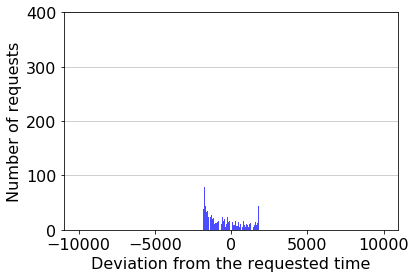

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=times_drt_acc, bins=np.arange(-10000,10000,60), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Deviation from the requested time', {'fontsize': 16})
plt.ylabel('Number of requests', {'fontsize': 16})
# plt.title('"Waiting" time, DRT', {'fontsize': 18})
plt.ylim([0,400])

plt.savefig('data/waiting_distr_drt.svg', dpi=600)

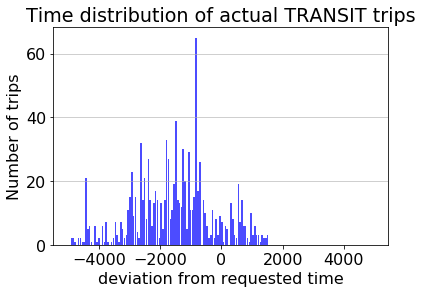

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=times_transit['diff2'], bins=np.arange(-5000,5000,60), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('deviation from requested time')
plt.ylabel('Number of trips')
plt.title('Time distribution of actual TRANSIT trips')

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)

plt.savefig('data/demand_distr.png', dpi=600)

In [45]:
composit = pd.DataFrame(times_transit[["time_req", "time_act"]])

In [50]:
composit.columns = ["time_req", "time_transit"]

In [55]:
composit = pd.concat([composit, times_drt], axis=1)

In [57]:
composit['diff'] = composit['time_transit'] - composit['time_act']

In [58]:
composit

,time_req,time_transit,time_req,time_act,diff
id,,,,,
4,27530.0,26760.0,27530,27671.5,-911.5
8,43490.0,42840.0,43490,45129.2,-2289.2
16,52239.0,53220.0,52239,53554.5,-334.5
19,36473.0,37440.0,36473,37588.7,-148.7
28,48928.0,47520.0,48928,49162.3,-1642.3
...,...,...,...,...,...
4516,58098.0,57000.0,58098,57198.4,-198.4
4517,45082.0,44040.0,45082,46384.7,-2344.7
4519,57515.0,57000.0,57515,59112.0,-2112.0


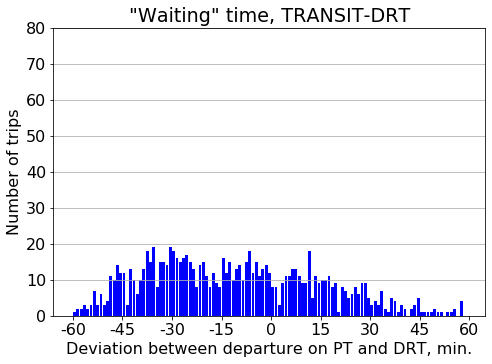

In [69]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 16}
matplotlib.rc('font', **font)
markersize = {'markersize': 9}
matplotlib.rc('lines', **markersize)

fig = plt.figure()
ax = fig.add_axes([1., 1., 1., 1.])

ax.hist(x=composit['diff'], bins=np.arange(-3600,3600,60), color='blue', rwidth=0.85, density=False)

plt.grid(axis='y')
plt.xlabel('Deviation between departure on PT and DRT, min.')
plt.xticks([x*60 for x in [-60, -45, -30, - 15, 0, 15, 30, 45, 60]])
ax.set_xticklabels([-60, -45, -30, - 15, 0, 15, 30, 45, 60])
plt.ylabel('Number of trips')
plt.title('"Waiting" time, TRANSIT-DRT')
plt.ylim([0,80])

plt.savefig('data/waiting_distr_pt-drt.png', bbox_inches="tight")

# Distribution of trip time

In [32]:
direct_trips_drt = []
direct_trips_drt_transit = []
direct_trips_transit = []
drt_trips = []
drt_transit_trips = []
transit_trips = []

for person in persons:
    for actual_trip, direct_trip in zip(person.get('actual_trips'), person.get('direct_trips')):
        if actual_trip.get('main_mode') == OtpMode.DRT:
            direct_trips_drt.append(direct_trip)
            drt_trips.append(actual_trip)
        elif actual_trip.get('main_mode') == OtpMode.DRT_TRANSIT:
            direct_trips_drt_transit.append(direct_trip)
            drt_transit_trips.append(actual_trip)
        elif actual_trip['main_mode'] == OtpMode.TRANSIT:
            direct_trips_transit.append(direct_trip)
            transit_trips.append(actual_trip)

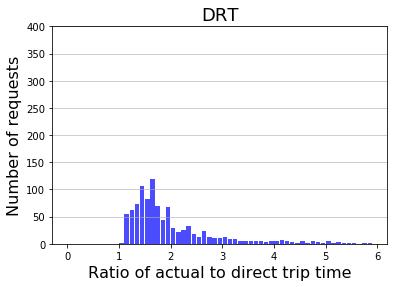

In [33]:
x = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_drt, drt_trips)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=x, bins=np.arange(0,6,0.1), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio of actual to direct trip time', {'fontsize': 16})
plt.ylabel('Number of requests', {'fontsize': 16})
plt.title('DRT', {'fontsize': 18})
plt.ylim([0,400])

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)

plt.savefig('data/demand_distr.png', dpi=600)

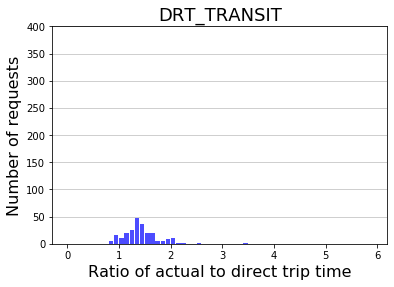

In [34]:
x = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_drt_transit, drt_transit_trips)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=x, bins=np.arange(0,6,0.1), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio of actual to direct trip time', {'fontsize': 16})
plt.ylabel('Number of requests', {'fontsize': 16})
plt.title('DRT_TRANSIT', {'fontsize': 18})
plt.ylim([0,400])

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)

plt.savefig('data/demand_distr.png', dpi=600)

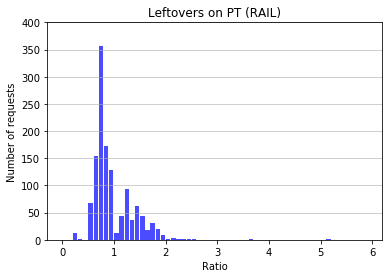

In [35]:
x = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_transit, transit_trips)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=x, bins=np.arange(0,6,0.1), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio')
plt.ylabel('Number of requests')
plt.title('Leftovers on PT (RAIL)')
plt.ylim([0,400])

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)

plt.savefig('data/demand_distr.png', dpi=600)

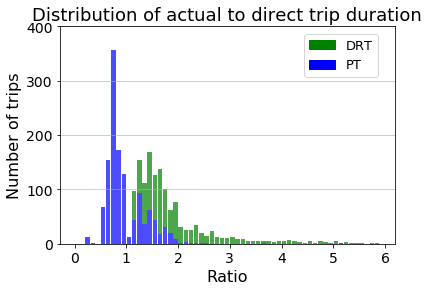

In [36]:
font = {'size': 14}
matplotlib.rc('font', **font)

x = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_drt, drt_trips)]

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.hist(x=x, bins=np.arange(0,6,0.1), color='green', alpha=1.0, rwidth=0.85, density=False, stacked=True)

x2 = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_transit, transit_trips)]
ax.hist(x=[x2,x], bins=np.arange(0,6,0.1), color=['blue', 'green'], alpha=0.7, rwidth=0.85, density=False, stacked=True)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio', {'fontsize': 16})
plt.ylabel('Number of trips', {'fontsize': 16})
plt.title('Distribution of actual to direct trip duration', {'fontsize': 18})
plt.ylim(0,400)

labels = ['DRT', 'PT']
colours = ['green','blue']
leg = [mpatches.Patch(color=c, label=l) for l,c in zip(labels,colours)]
plt.legend(handles=leg, bbox_to_anchor=(0.97, 0.995), fontsize=13)

plt.savefig('data/sim_mult_distr.png', dpi=600, bbox_inches="tight")

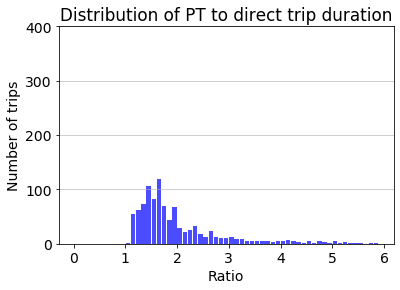

In [37]:
font = {'size': 14}
matplotlib.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=x, bins=np.arange(0,6,0.1), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio')
plt.ylabel('Number of trips')
plt.title('Distribution of PT to direct trip duration')

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)
plt.ylim(0,400)

plt.savefig('data/pt_multiplier_distr.png', dpi=600, bbox_inches="tight")

### now for PT only

In [38]:
direct_trips_transit = []
transit_trips = []

for person in persons_pt:
    for actual_trip, direct_trip in zip(person.get('actual_trips'), person.get('direct_trips')):
        if actual_trip['main_mode'] == OtpMode.TRANSIT:
            direct_trips_transit.append(direct_trip)
            transit_trips.append(actual_trip)

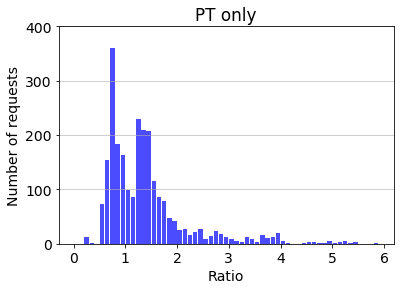

In [39]:
x = [at['duration']/dt['duration'] for dt,at in zip(direct_trips_transit, transit_trips)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x=x, bins=np.arange(0,6,0.1), color='blue', alpha=0.7, rwidth=0.85, density=False)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ratio')
plt.ylabel('Number of requests')
plt.title('PT only')
plt.ylim([0,400])

# plt.xticks([x*3600 for x in [0, 3, 6, 9, 12, 15, 18, 21, 24]])
# names_x = ['00:00','03:00','6:00','9:00','12:00','15:00','18:00','21:00', '24:00']
# ax.set_xticklabels(names_x,rotation=45)

plt.savefig('data/demand_distr.png', dpi=600)